Лабораторан робота 5

1.Створити набір даних за допомогою DatasetGenerator.

In [8]:
from sklearn.datasets import make_classification
import pandas as pd

# Створення набору даних
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Перетворення на DataFrame для зручності
data = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(1, 11)])
data['Target'] = y

# Виведення першої частини набору даних
data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274,0
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470,1
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376,1
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039,0
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224,1


2.Завантажити набір даних для класифікації з сайту Kaggle. Кожен студент має обрати унікальний набір даних.

Використовуємо weather_classification_data.csv

In [9]:
weather = pd.read_csv('weather_classification_data.csv')
weather.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


3.(Опціонально для отримання відмінної оцінки) Згенерувати набір даних для класифікації, використовуючи стандартні можливості Python (наприклад, з допомогою бібліотек Numpy або random).


In [11]:
import numpy as np
import random
import pandas as pd

# Налаштування параметрів
n_samples = 1000  # Кількість зразків
n_features = 10   # Кількість ознак
n_classes = 2     # Кількість класів

# Генерація випадкових ознак
X = np.random.randn(n_samples, n_features)  # Випадкові значення за нормальним розподілом

# Генерація випадкових міток класів
y = np.array([random.randint(0, n_classes-1) for _ in range(n_samples)])

# Перетворення на DataFrame
data = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(1, n_features+1)])
data['Target'] = y

# Виведення першої частини набору даних
data.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,-0.956332,2.045881,-0.512163,-0.968160,0.399011,0.400048,-0.851399,-1.127411,-1.344090,-0.512159,0
1,1.652279,0.756731,-1.055298,-0.629030,-1.236083,0.977446,1.820578,0.168133,-0.531154,-0.237556,1
2,0.844151,0.493368,0.167844,0.832818,-0.082165,0.999681,-0.959730,1.505905,0.728888,0.278166,1
3,-1.698891,0.379961,1.814435,0.047256,0.790977,2.014189,-0.314493,0.560541,0.478601,0.789088,0
4,-0.871469,-0.511216,-0.183797,-1.865068,-0.406573,0.189020,1.062673,-1.335170,-0.768235,-0.998822,1


4.Для отриманих наборів даних провести встановленні кроки моделювання.

Для згенерованого набору даних

Accuracy: 52.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.75      0.61       100
           1       0.54      0.29      0.38       100

    accuracy                           0.52       200
   macro avg       0.53      0.52      0.49       200
weighted avg       0.53      0.52      0.49       200

Mean Absolute Error (MAE): 0.4800
Mean Classification Error (MCE): 0.4800
Precision: 0.5370
Recall: 0.2900
F1-Score: 0.3766


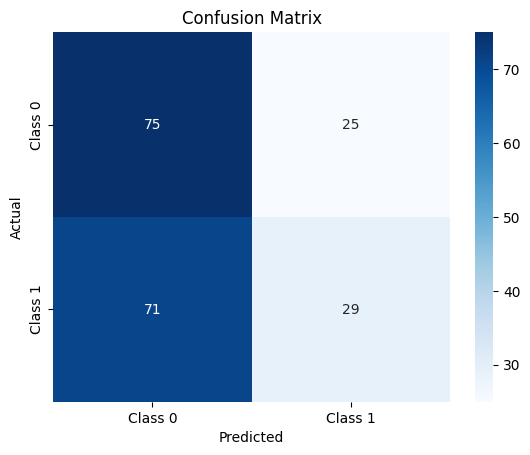

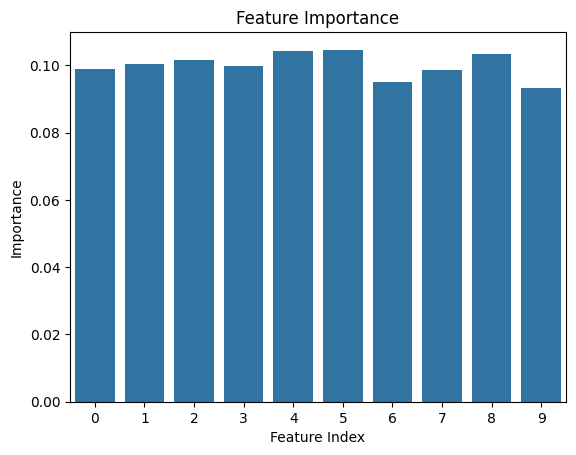

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error,  precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Створення згенерованих даних (як у попередньому прикладі)
n_samples = 1000  # Кількість зразків
n_features = 10   # Кількість ознак
n_classes = 2     # Кількість класів

# Генерація випадкових ознак
X = np.random.randn(n_samples, n_features)  # Випадкові значення за нормальним розподілом

# Генерація випадкових міток класів
y = np.array([random.randint(0, n_classes-1) for _ in range(n_samples)])

# Перетворення на DataFrame
data = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(1, n_features+1)])
data['Target'] = y

# Обробка пропущених значень (у даному випадку заповнення середнім значенням)
# Якщо в даних є пропущені значення, заміняємо їх на середнє значення по кожному стовпцю
data.fillna(data.mean(), inplace=True)

# Масштабування ознак
scaler = StandardScaler()
data_scaled = data.drop(columns='Target')  # Не масштабуємо мітки класів
data_scaled = pd.DataFrame(scaler.fit_transform(data_scaled), columns=data.columns[:-1])

# Розподіл на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data['Target'], test_size=0.2, random_state=42)

# Ініціалізація моделі випадкового лісу
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Навчання моделі
model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = model.predict(X_test)

# Оцінка точності
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Детальний звіт по метрикам
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# MAE та MCE
mae = mean_absolute_error(y_test, y_pred)
mce = 1 - accuracy  # Помилка класифікації = 1 - Точність


print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Classification Error (MCE): {mce:.4f}")

# Метрики Precision, Recall та F1-Score
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Матриця сплутаності
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[f'Class {i}' for i in range(n_classes)], yticklabels=[f'Class {i}' for i in range(n_classes)])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Візуалізація важливості ознак
feature_importances = model.feature_importances_
sns.barplot(x=np.arange(len(feature_importances)), y=feature_importances)
plt.title("Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


Для weather_classification_data.csv

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64
Accuracy: 90.98%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       651
           1       0.91      0.90      0.91       647
           2       0.93      0.94      0.94       701
           3       0.93      0.90      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640

Mean Absolute Error (MAE): 0.1508
Mean Classification Error (MCE): 0.0902
Precision (macro): 0.9100
Recall (macro): 0.9092
F1-Score (macro): 0.9094


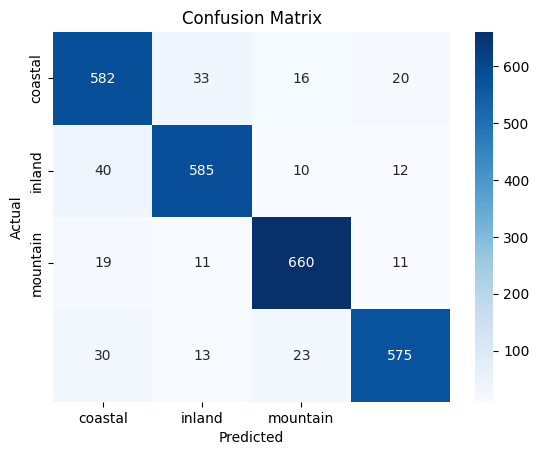

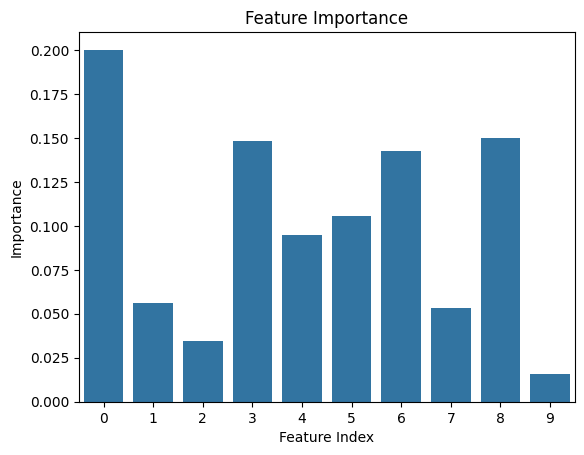

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження даних
data = pd.read_csv('weather_classification_data.csv')

# Перевірка на пропущені значення
print(data.isnull().sum())

# Кодування категоріальних змінних
label_encoder = LabelEncoder()

# Кодуємо Weather Type, Season та Location
data['Weather Type'] = label_encoder.fit_transform(data['Weather Type'])
data['Season'] = label_encoder.fit_transform(data['Season'])
data['Location'] = label_encoder.fit_transform(data['Location'])

# Для 'Cloud Cover' ми можемо використати LabelEncoder (або можна замінити за допомогою OneHotEncoding)
cloud_cover_encoder = LabelEncoder()
data['Cloud Cover'] = cloud_cover_encoder.fit_transform(data['Cloud Cover'])

# Вибір ознак та цільової змінної
X = data.drop(columns=['Weather Type'])  # Всі стовпці, крім Weather Type
y = data['Weather Type']  # Цільова змінна

# Масштабування числових ознак
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Розподіл на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ініціалізація моделі випадкового лісу
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Навчання моделі
model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = model.predict(X_test)

# Оцінка точності
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Детальний звіт по метрикам
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# MAE та MCE
mae = mean_absolute_error(y_test, y_pred)
mce = 1 - accuracy  # Помилка класифікації = 1 - Точність
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Classification Error (MCE): {mce:.4f}")

# Метрики Precision, Recall та F1-Score (з виправленими параметрами average для багатокласової класифікації)
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' для багатокласової класифікації
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' для багатокласової класифікації
f1 = f1_score(y_test, y_pred, average='macro')  # 'macro' для багатокласової класифікації

print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-Score (macro): {f1:.4f}")

# Матриця сплутаності
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Візуалізація важливості ознак
feature_importances = model.feature_importances_
sns.barplot(x=np.arange(len(feature_importances)), y=feature_importances)
plt.title("Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()
